# 5. K-means (clustering by unsupervised learning)

In [70]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [74]:
X = dataset.iloc[:, :].values
# X = dataset.values와 같은 동작임
# X = dataset.to_numpy() 이것도 같은 동작임
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

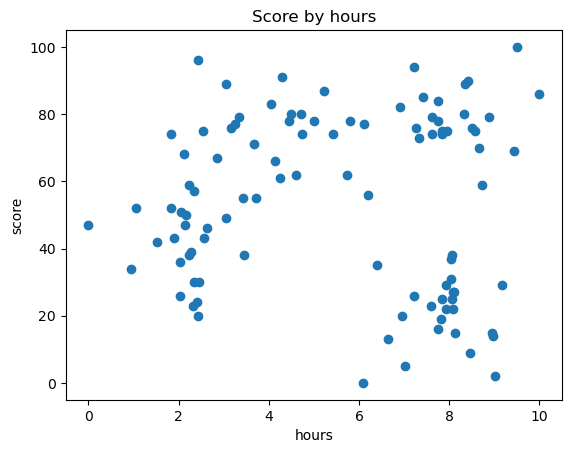

In [77]:
plt.scatter(X[:,0], X[:,1]) #x축은 hour, y축은 score
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (축 범위 통일)

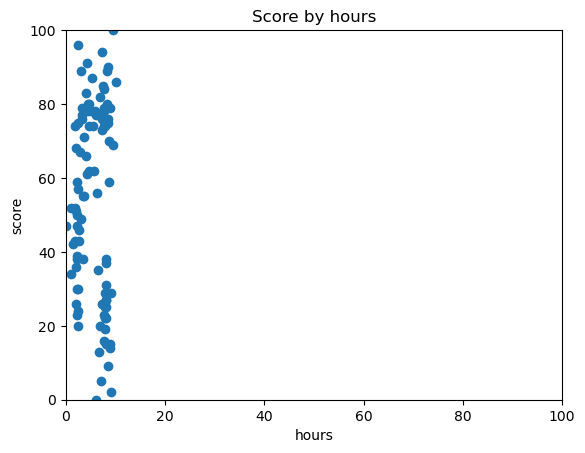

In [80]:
plt.scatter(X[:,0], X[:,1]) #x축은 hour, y축은 score
plt.title("Score by hours")
plt.xlabel("hours")
plt.xlim(0,100)
plt.ylabel("score")
plt.ylim(0,100)
plt.show()

위에 두 시각화 그림의 차이를 이해하자.
그냥 단위를 생각하지 않았을 때, 위에 두 그림에서 나오는 k-means의 값이 서로 달라릴 거야.
다양한 feature를 생각할 때 서로 다른 다위에 따라서 계산이 달라짐으로 그것을 어떻게 변환할 것인지가 중요해져. feature scaling이지.
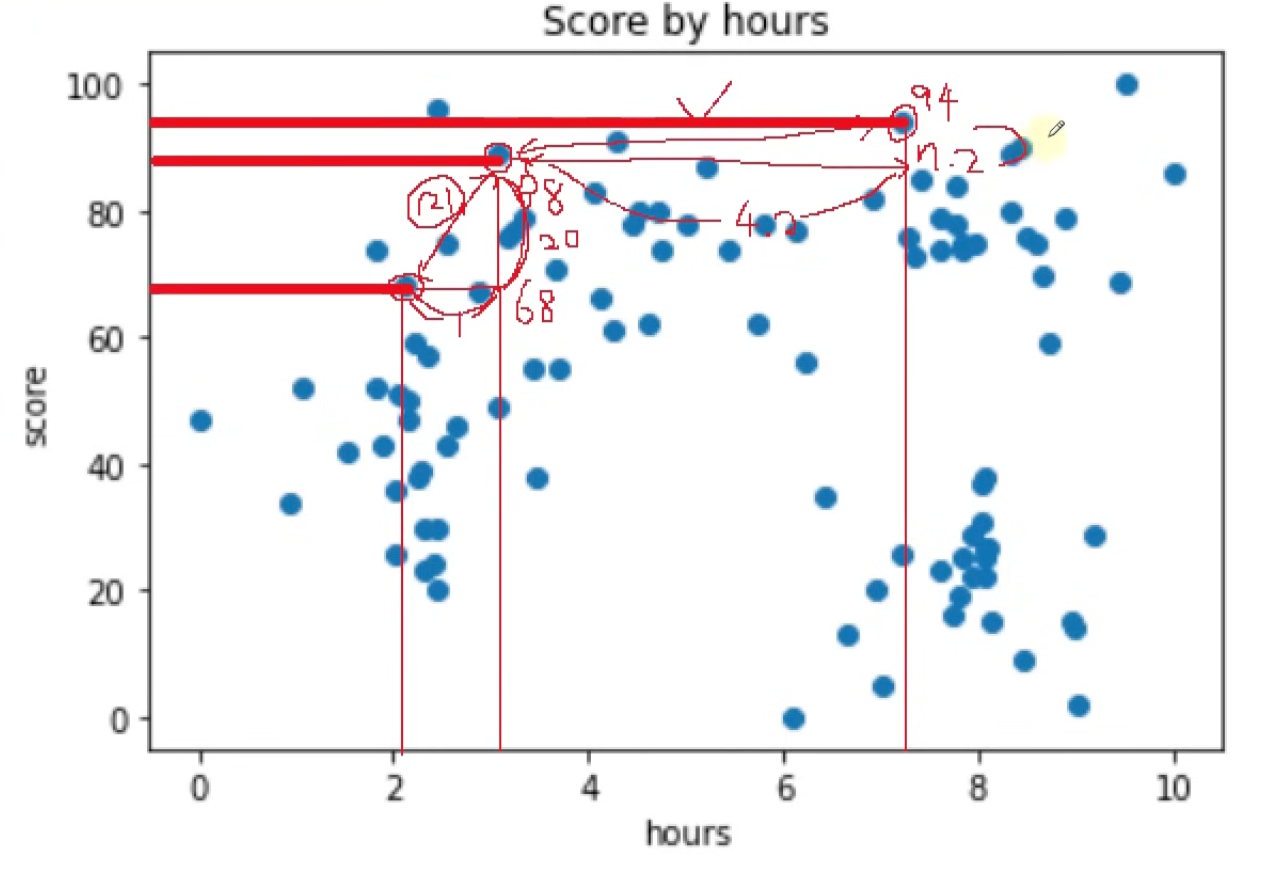

### 피처 스케일링 (Feature Scaling)

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X = sc.fit_transform(X)
#이 함수가 전체 단위를 같은 숫자 단위로 만들어주는 것.
# 1~10까지의 시간과, 1~100까지의 점수를 비교하는게 그냥 단순 숫자로는 계산이 안되니까 그 문제를 해결하기 위해 feature scaling을 하는것.
# -2부터 +2사이의 숫자로 비율로 정해서 변환시켜주는거지.
# 그럼 처음 시각화 했던 plot graph에서 거리를 계산하는 것과 같이 되겠지.
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링 된 데이터)

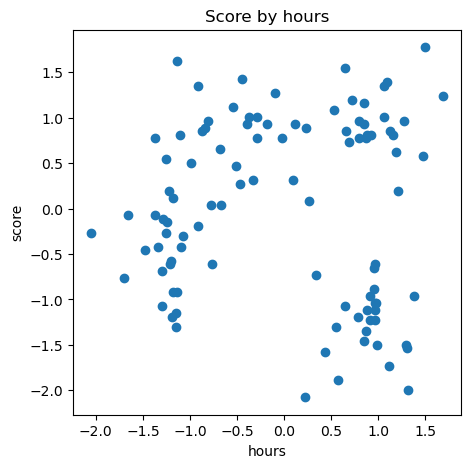

In [87]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1]) #x축은 hour, y축은 score
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 최적의 K값 찾기 (Elbow Method)

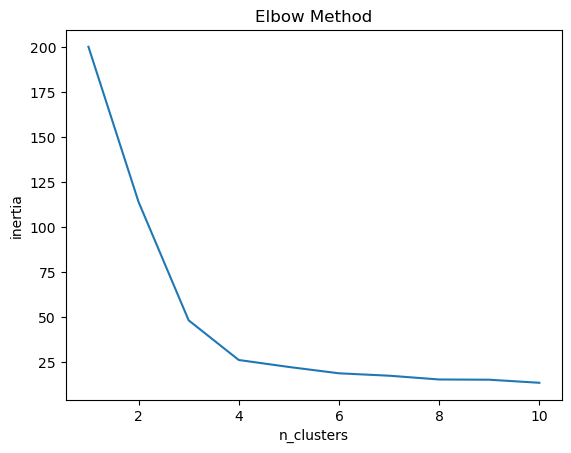

In [103]:
from sklearn.cluster import KMeans
inertia_list = [] #클러스터 속한 데이터 안에서 얼마나 가깝게 나타나는지를 보여주는 것
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합

plt.plot(range(1, 11), inertia_list)
plt.title("Elbow Method")
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.show()

### 최적의 K(4)값으로 KMeans학습


In [114]:
K = 4 #최적의 k값은 4

In [118]:
kmeans = KMeans(n_clusters=K, random_state=0)
#kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [120]:
y_kmeans

array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
       3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32)

### 데이터 시각화 (최적의 K)

In [129]:
centers = kmeans.cluster_centers_ #클러스터의 중심점 centroid 좌표
centers

array([[-0.54299598,  0.79316666],
       [ 0.96910697,  0.97133061],
       [ 0.8837666 , -1.26929779],
       [-1.24939347, -0.48807293]])

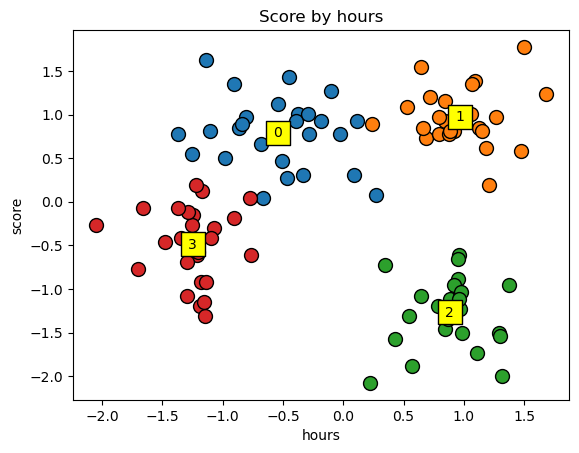

In [133]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') #클러스터 텍스트 출력

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

# s는 각 plot의 사이즈
#X값 중에서 0의 클러스터에 속한 데이터 값만 가져오는 법은 

### 데이터 시각화 (스케일링 원복)

In [138]:
X_org = sc.inverse_transform(X) #피쳐 스케일링 된 작업을 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [142]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

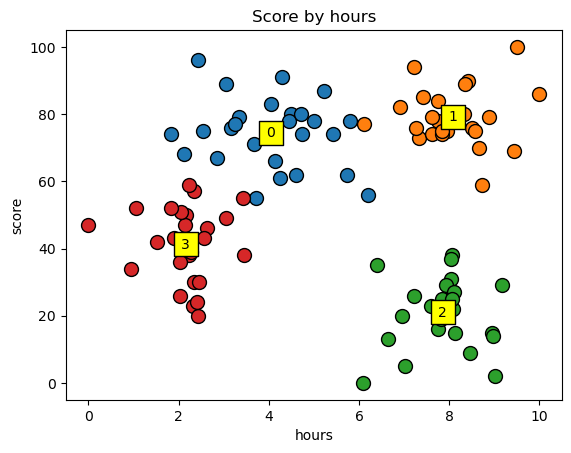

<Figure size 500x500 with 0 Axes>

In [148]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center') #클러스터 텍스트 출력

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.figure(figsize=(5, 5))
plt.show()

# s는 각 plot의 사이즈
#X값 중에서 0의 클러스터에 속한 데이터 값만 가져오는 법은 